# <font style="color:green">Trabalho da Disciplina de Processamento Digital de Imagens 3</font>

Neste trabalho, apresentamos 3 implementações dos algorítmos de métodos existentes que nos ajuda a detectar as bordas de uma imagem. Cada questão cobrada foram usadas as respectivas bibliotecas numpy, opencv, e matplotlib

# <font style="color:green">Documentações</font>

* Numpy: https://numpy.org/doc/stable/
* Matplotlib: https://matplotlib.org/3.5.1/index.html
* Opencv: https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html;

## Questão 1. 

Implemente e exiba os testes realizados para validar sua implementação (use funções existentes na OpenCV) três algoritmos de detecção de bordas:

### Letra a. Sobel ou Prewitt:

Em termos de simplicidade, preferi escolher o sobel.

#### Importando as bibliotecas

In [103]:
import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image,ImageOps,ImageFilter

#### Primeira  leitura e impressão

In [104]:
# Lendo a imagem, convertendo em tons cinzas e em seguida, aplicando um desfoque Gaussiano para que seja possível detectar as bordas
img = cv.imread('imagem/'+'lena'+'.jpg')[:,:,::-1]
gray_Image = cv.cvtColor(img, cv.COLOR_RGB2GRAY).astype(float)
gaussianBlur_Image = cv.GaussianBlur(gray_Image, [5, 5], 0)

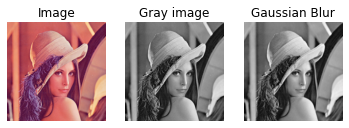

In [105]:
# Impressão prévia da mudança da imagem escolhida
plt.subplot(1, 3, 1)
plt.axis('off')
plt.title('Image')
plt.imshow(img, cmap='BrBG')

plt.subplot(1, 3, 2)
plt.axis('off')
plt.title('Gray image')
plt.imshow(gray_Image, cmap='gray')

plt.subplot(1, 3, 3)
plt.axis('off')
plt.title('Gaussian Blur')
plt.imshow(gaussianBlur_Image, cmap='gray')

plt.show()

#### Chamada das funções

#### Filtro de Sobel

In [106]:
def sobel_Filter(gray_Image):
    
    # Utiliza 2 kernels (o primeiro é responsável pela eixo y, enquanto o segundo, x, que é uma matriz transposta do anterior)
    sy = np.array([[-1.0, 0.0, 1.0],
                   [-2.0, 0.0, 2.0],
                   [-1.0, 0.0, 1.0]])
    sx = np.transpose(sy)
    
    # Com os kernels definidos, é feito a operação de covolução da imagem em tons de cinzas para cada eixo x, y da imagem
    sy_Image = cv.filter2D(gray_Image, -1, sy)
    sx_Image = cv.filter2D(gray_Image, -1, sx)
    
    # Operação da magnitude do gradiente da imagem com o uso do método sqrt e np square, desta forma a magnitude do gradiente
    # é definida pela raiz quadrada de sy_Image e sx_Image, ambos ao quadrado
    magnitudeGradient_Image = np.sqrt(np.square(sy_Image) + np.square(sx_Image))
    magnitudeGradient_Image *= 255.0 / np.max(magnitudeGradient_Image)
    
    # Exibição dos resultados obtidos
    plt.subplot(1, 3, 1)
    plt.axis('off')
    plt.title('Vertical Edge')
    plt.imshow(sy_Image, cmap='gray')
    
    plt.subplot(1, 3, 2)
    plt.axis('off')
    plt.title('Horizontal Edge')
    plt.imshow(sx_Image, cmap='gray')
    
    plt.subplot(1, 3, 3)
    plt.axis('off')
    plt.title('Gradient Image')
    plt.imshow(magnitudeGradient_Image, cmap='gray')

    plt.show()
    
    return magnitudeGradient_Image.astype(np.uint8)

#### Resultados obtidos pelo método sobel_Filter

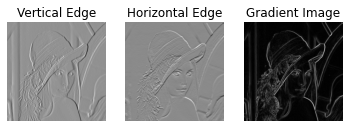

In [107]:
magnitudeGradient_Image = sobel_Filter(gaussianBlur_Image)

#### Limiar automaticamente  uma imagem

In [108]:
def generateThreshold_image(magnitudeGradient_Image):
    
    # Primeiramente para que o resultado seja mais preciso (quase sem ruídos) uiliza-se novamente o filtro Gaussiano com kernel 5x5
    magnitudeGradientImage_blurred = cv.GaussianBlur(magnitudeGradient_Image, [5, 5], 0)
    
    # Em seguida, utiliza-se como argumentado da função threshold, cv.THRESH_OTSU que é um responsável em gerar automaticamente uma
    # imagem limiarizada, sem a necessidade de passar valores variáveis para que tenha um resultado mais objetivo
    threshold, thresh = cv.threshold(magnitudeGradient_Image, 0, 255, cv.THRESH_OTSU)

    # Exibição do resultado
    plt.figure()
    plt.axis('off')
    plt.title('Sobel Thresholded Image')
    plt.imshow(thresh, cmap='gray')
    
    plt.show()

#### Resultados obtidos pelo método generateThreshold_image

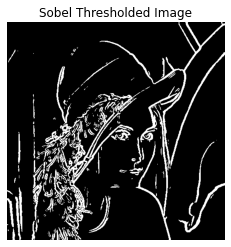

In [109]:
threshold_Image = generateThreshold_image(magnitudeGradient_Image)

### Letra b. Laplaciano:

A funcao de convolucao aplica a maskara sobre a imagem, a imagem resultante é utilizada na funcao de zero_crossing

In [110]:
def convolution(image, kernel):
    m, n = np.shape(kernel)
    x, y = np.shape(image)
    x = x - m + 1
    y = y - m + 1
    resultImg = np.zeros((x,y))
    for i in range(x):
        for j in range(y):
            resultImg[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return resultImg

In [111]:
source = cv.imread('imagem/'+'lena'+'.jpg')
source_gray = cv.cvtColor(source, cv.COLOR_BGR2GRAY)

In [112]:
imgArr = np.asarray(source_gray, dtype="int32")
imgArr

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]])

In [113]:
#laplacian mask
mask1 = [[0,1,0],
       [1,-4,1],
       [0,1,0]]

mask2 = [[-1,-1,-1],
       [-1,8,-1],
       [-1,-1,-1]]

In [114]:
dstImg1 = convolution(imgArr,mask1)
dstImg2 = Image.fromarray(dstImg1)

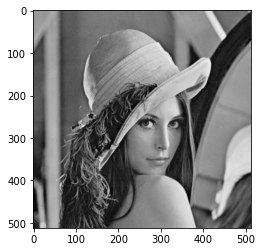

In [115]:
plt.imshow(source_gray,cmap='gray')

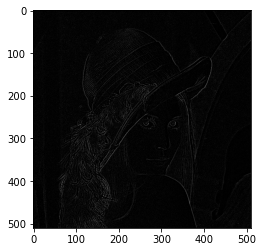

In [116]:
plt.imshow(dstImg2,cmap='gray')

In [117]:
def Zero_crossing(image):
    x, y = np.shape(image)
    crossing_image = np.zeros((x,y))
    
    for i in range(1, x - 1):
        for j in range(1, y - 1):
            negative_count = 0
            positive_count = 0
            vizinhos = [image[i+1, j-1],image[i+1, j],image[i+1, j+1],image[i, j-1],image[i, j+1],image[i-1, j-1],image[i-1, j],image[i-1, j+1]]
            d = max(vizinhos)
            e = min(vizinhos)
            for h in vizinhos:
                if h>0:
                    positive_count += 1
                elif h<0:
                    negative_count += 1
            
            z_c = ((negative_count > 0) and (positive_count > 0))
            
            if z_c:
                if image[i,j]>0:
                    crossing_image[i, j] = image[i,j] + np.abs(e)
                elif image[i,j]<0:
                    crossing_image[i, j] = np.abs(image[i,j]) + d

    z_c_norm = crossing_image/crossing_image.max()*255
    z_c_image = np.uint8(z_c_norm)

    return z_c_image

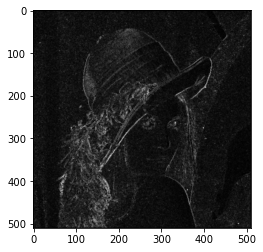

In [118]:
out = Zero_crossing(dstImg1)
out = Image.fromarray(out)
plt.imshow(out,cmap='gray')

In [119]:
source2 = cv.imread('imagem/'+'lena'+'.jpg')
source_gray2 = cv.cvtColor(source, cv.COLOR_BGR2GRAY)

In [120]:
filtered_image = cv.Laplacian(source_gray2, ksize=3, ddepth=cv.CV_16S)
filtered_image = cv.convertScaleAbs(filtered_image)

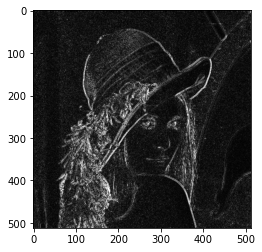

In [121]:
plt.imshow(filtered_image,cmap='gray')

### Letra c. Canny:

Para implementar o método Canny, utilizei o já existente filtro sobel, visto que o mesmo demonstra em ser uma extensão do mesmo. Alguns trechos foram desnecessários em comentar por questões de repetição.

#### Primeira impressão:

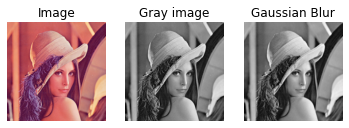

In [122]:
img = cv.imread('imagem/'+'lena'+'.jpg')[:,:,::-1]
gray_Image = cv.cvtColor(img, cv.COLOR_RGB2GRAY).astype(float)
gaussianBlur_Image = cv.GaussianBlur(gray_Image, [5, 5], 0)

plt.subplot(1, 3, 1)
plt.axis('off')
plt.title('Image')
plt.imshow(img, cmap='BrBG')

plt.subplot(1, 3, 2)
plt.axis('off')
plt.title('Gray image')
plt.imshow(gray_Image, cmap='gray')

plt.subplot(1, 3, 3)
plt.axis('off')
plt.title('Gaussian Blur')
plt.imshow(gaussianBlur_Image, cmap='gray')

plt.show()

#### sobel_Filter

In [123]:
def sobel_Filter(gray_Image):
    sy = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sx = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    
    sy_Image = cv.filter2D(gray_Image, -1, sy)
    sx_Image = cv.filter2D(gray_Image, -1, sx)
   
    magnitudeGradient_Image = np.sqrt(np.square(sy_Image) + np.square(sx_Image))
    magnitudeGradient_Image *= 255.0 / magnitudeGradient_Image.max()
    
    plt.subplot(1, 3, 1)
    plt.axis('off')
    plt.title('Vertical Edge')
    plt.imshow(sy_Image, cmap='gray')
    
    plt.subplot(1, 3, 2)
    plt.axis('off')
    plt.title('Horizontal Edge')
    plt.imshow(sx_Image, cmap='gray')
    
    plt.subplot(1, 3, 3)
    plt.axis('off')
    plt.title('Gradient Image')
    plt.imshow(magnitudeGradient_Image, cmap='gray')

    plt.show()
    
    # Após o cálculo da magnitude do gradiente, é feito também o cálculo da direção do gradiente pelos os quais
    # irão fornecer dados precisos para fazer supresão não máxima
    def calculate_directionMagnitude():
        
        # Utiliza-se o método arcotan2 que é dada uma resposta em radiano do ângulo dos pixels. Em seguida
        # esses valores são convertidos em graus
        directionMagnitudeGradient_Image = np.arctan2(sy_Image, sx_Image)
        directionMagnitudeGradient_Image = np.rad2deg(directionMagnitudeGradient_Image)
        
        # Afim de evita erros, caso haja pixels negativos na imagem, é substituído pelo valor 180
        directionMagnitudeGradient_Image[directionMagnitudeGradient_Image < 0] = 180
        
        return directionMagnitudeGradient_Image
    
    # Chamada do método que calculará o ângulo de cada píxel da imagem.
    directionMagnitudeGradient_Image = calculate_directionMagnitude()
    
    return (magnitudeGradient_Image, directionMagnitudeGradient_Image)

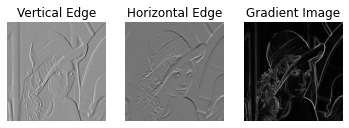

In [124]:
magnitudeGradient_Image, directionMagnitudeGradient_Image = sobel_Filter(gaussianBlur_Image)

#### Filtro de Canny

In [125]:
# Método responsável em gerar o filtro de Canny. Dentro dele, há outros 3 métodos. O primeiro é responsável pelo
# supressão não máxima, o segundo gerará 2 limiar, enquanto o terceiro gerará um histerese, trechos do código de
# bastante importância
def canny_Filter(magnitudeGradient_Image, directionMagnitudeGradient_Image):
    
    # Este método fica responsável pela supressão não máxima dos pixeis. Ele recebe como parâmetro magnitude do gradiente imagem da
    # imagem e a direção. Ele diminui e deixa as bordas mais finas na imagem de acordo com os angulos.
    def nonMaxSuppresion(magnitudeGradient_Image, directionMagnitudeGradient_Image):
        # As variáveis descritas abaixo correspondem respectivamente as e colunas da imagem
        rows_Image, colums_Image = magnitudeGradient_Image.shape
        
        # Variável que inicialmente recebe uma matriz de zeros do mesmo tamanho magnitud do gradiente da imagem
        # No último if descrito ela receberá o valor com base nas condições estabelecidas para cada if
        nonMaxSuppresion_Image = np.zeros(magnitudeGradient_Image.shape)
        
        # Esta variável fica em responsável em receber o valor 180, visto que o ângulo de 180° ser
        # expressado em PI e 90° em PI / 2 e assim adiante.
        PI = 180
        
        # Primeiro for para linhas
        for row in range(1, rows_Image-1):
            # Segundo for para colunas
            for colum in range(1, colums_Image-1):
                # Tem-se uma variável responsável receber o valor em graus do angulo da direção dos pixeis da imagem
                direction_Agle = directionMagnitudeGradient_Image[row, colum]

                # A sequência de IF's ajuda a verificar quais pixels tem uma maior intensidade quandos eles se encontram na 
                # mesma direção. Cada if corresponde a qual ângulo será tratado na direção. Caso exista algum pixel mais 
                # intenso do o pixel processado, apenas o mais intenso permance. Desta forma, dentro de cada IF's tem-se as 
                # variaveis before_Pixel e after_Pixel que recebem respectivamente o pixel anterior e o pixel proximo
                
                # 0°
                if (0 <= direction_Agle < PI / 8) or (15 * PI / 8 <= direction_Agle <= 2 * PI):
                    before_Pixel = magnitudeGradient_Image[row, colum-1]
                    after_Pixel = magnitudeGradient_Image[row, colum+1]
                    
                # 45°
                elif (PI / 8 <= direction_Agle < 3 * PI / 8) or (9 * PI / 8 <= direction_Agle < 11 * PI / 8):
                    before_Pixel = magnitudeGradient_Image[row+1, colum-1]
                    after_Pixel = magnitudeGradient_Image[row-1, colum+1]
                    
                # 90°
                elif (3 * PI / 8 <= direction_Agle < 5 * PI / 8) or (11 * PI / 8 <= direction_Agle < 13 * PI / 8):
                    before_Pixel = magnitudeGradient_Image[row-1, colum]
                    after_Pixel = magnitudeGradient_Image[row+1, colum]
                    
                # 135°
                else:
                    before_Pixel = magnitudeGradient_Image[row-1, colum-1]
                    after_Pixel = magnitudeGradient_Image[row+1, colum+1]
                    
                # Caso a magnitudeGradient_Image da imagem seja maior ou igual a before_Pixel e after_Pixel, então,
                # a matrix nonMaxSuppresion_Image recebe  os valores de magnitudeGradient_Image
                if((magnitudeGradient_Image[row, colum] >= before_Pixel) and (magnitudeGradient_Image[row, colum] >= after_Pixel)):
                    nonMaxSuppresion_Image[row, colum] = magnitudeGradient_Image[row, colum]
                    
        return nonMaxSuppresion_Image
    
    # O método threshold corresponde em gerar 2 limiares e ajudará identificar quais pixels vão constituir 
    # a borda e quais, são fracos e não constituem. Após a etapa, utilizaremos o hysteresiss
    def threshold(nonMaxSuppresion_Image):
        # Cria-se uma matriz de zero responsável pelo saída
        threshold_Image = np.zeros((nonMaxSuppresion_Image.shape), dtype=np.uint8)
        
        # A variável low fica responsável em identificar pixels com valores consideravelmente baixos em comparação aos altos
        # Enquanto a variável high é responsável em encontrar pixeis com intensidades fortes 
        low = 17
        high = 34
        
        # A variável weak fica responsável em analisar pixels fracos, enquanto a variável strong
        # funciona de forma análoga
        weak = 100
        strong = 255
        
        # weak_Row e weak_Col correspondem as linhas e colunas onde os pixels fracos se encontram, enquanto
        # strong_Rows e strong_Colum correspondem as dos pixels fortes. Utiliza-se o método np.where
        # que para as variaveis recebem respectivamente os valores baixos e altos dos pixels da imagem
        weak_Row, weak_Colum = np.where((nonMaxSuppresion_Image >= low) & (nonMaxSuppresion_Image <= high))
        strong_Row, strong_Colum = np.where(nonMaxSuppresion_Image >= high)
        
        # Por fim, threshold_Image entre linhas e coluna de respectiva entre weak e  row,, recebem os valores
        # fracos e fortes dos pixels
        threshold_Image[weak_Row, weak_Colum] = weak
        threshold_Image[strong_Row, strong_Colum] = strong
        
        return (threshold_Image, weak, strong)
    
    # O método hysteresis fica responsável em transformar pixels fracos da imagem em pixels fortes, caso estritamente
    # haja um pixel forte ao redor de um pixel que está sendo processado
    def hysteresis(threshold_Image, weak, strong):
        # hysteresis_Image é uma matriz iniciada com zeros e que será nossa saída. E também vai receber os pixels da imagem
        # dentro do for
        hysteresis_Image = np.zeros(threshold_Image.shape)   
        
        # row_Image, e colums_Image correspondem respectivamente as linhas e colunas da imagem
        rows_Image, colums_Image = threshold_Image.shape
        
        
        for row in range(1, rows_Image-1):
            for colum in range(1, colums_Image-1):
                hysteresis_Image[row, colum] = threshold_Image[row, colum]
                
                # O primeiro if tem como objetivo em analisar se determinado pixel da  imagem é igual ao valor de um pixel fraco
                if (hysteresis_Image[row, colum] == weak):
                    # O segundo if fica relacionado em analisar as adjacências dos pixels processados na imagem se é igual ao
                    # valor de um pixel forte (255). Como se trata de um operador or, mesmo que todas as condições conjuntas
                    # não seja, algumas delas podem ser verdadeiro e então, a matriz hysteresis_Image recebe um pixel com
                    # falor extremamente forte (equivalente a cor branca)
                    if ((hysteresis_Image[row+1, colum-1] == strong) or (hysteresis_Image[row+1, colum] == strong) 
                        or (hysteresis_Image[row+1, colum+1] == strong) or (hysteresis_Image[row, colum-1] == strong) 
                        or (hysteresis_Image[row, colum+1] == strong) or (hysteresis_Image[row-1, colum-1] == strong) 
                        or (hysteresis_Image[row-1, colum] == strong) or (hysteresis_Image[row-1, colum+1] == strong)):
                        hysteresis_Image[row, colum] = strong
                    # E se a condição não for cumprida, o que indica que não há presença de pixels fortes na vizinhança do 
                    # pixel processado então, receberá um valor extremamente fraco (equivalente a cor preta), o que indica 4
                    # que não há nenhuma relação para constituir uma borda
                    else:
                        hysteresis_Image[row, colum] = 0
                            
        return hysteresis_Image
    
    nonMaxSuppresion_Image = nonMaxSuppresion(magnitudeGradient_Image, directionMagnitudeGradient_Image)
    threshold_Image, weak, strong = threshold(nonMaxSuppresion_Image)
    hysteresis_Image = hysteresis(threshold_Image, weak, strong)
    
    # Resultados gerados
    plt.subplot(1, 3, 1)
    plt.axis('off')
    plt.title('Non Max Supression')
    plt.imshow(nonMaxSuppresion_Image, cmap='gray')
    
    plt.subplot(1, 3, 2)
    plt.axis('off')
    plt.title('Threshold')
    plt.imshow(threshold_Image, cmap='gray')
    
    plt.subplot(1, 3, 3)
    plt.axis('off')
    plt.title('Hystereses')
    plt.imshow(hysteresis_Image, cmap='gray')
    
    plt.show()

#### Saída

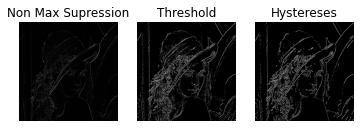

In [126]:
canny_Filter(magnitudeGradient_Image, directionMagnitudeGradient_Image)

## Questão 2.

Dê uma proposta (uma ideia de desenvolvimento) de um método para avaliar
numericamente a qualidade de um método de extração/detecção de bordas. Ou seja, como
você faria para medir o quão boa é a implementação de um método de detecção de bordas?